# DATA_620:Project_2

<b>GROUP3: </b>

+ Md. Jalal Uddin
+ Rajwant Mishra
+ Sarah Wigodsky

YouTube : [here](https://www.youtube.com/watch?v=OUm6-dfn9n8&feature=youtu.be) 


Assignment Details: <br>
1) Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2) Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3) What can you infer about each of the distinct groups?


<b>Data Source: </b>NASA Astrophysics Data System (https://ui.adsabs.harvard.edu/)

NASA Astrophysics Data has the affiliations between authors and their journals. This data set is a large 2-node network data set which has the information of Journal name and Author name of publication. For example, there are two or more journal for one publications. The primary objective of this project is to use clustering techniques such as the island method. With the help of the method we will to try to find small sub-networks/subgroups of important authors that are frequently collaborating together. We will also see which journals stand out as main points for these types of collaborations.



For this project, we have first imported some libraries. We imported networkx, networkx's bipartite, matplotlib's pyplot for graphing, and Numpy's for mathematical calculations and figures. Then we have created the data using on.environment as below:


In [151]:
import networkx as nx
import os
import ads as ads 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math 

import pandas as pd
import numpy as np
from networkx.algorithms import bipartite as bi
from networkx.algorithms import bipartite
plt.figure(figsize = (17,8))
%matplotlib inline


##### Building the data set from Astrophysics data system:


In [154]:
os.environ["ADS_DEV_KEY"] = "kNUoTurJ5TXV9hsw9KQN1k8wH4U0D7Oy0CJoOvyw"

In [155]:
ads.config.token = 'ADS_DEV_KEY'

In [156]:
#Searching for papers which are most rated: I have searched here for those journal which have given most stars.
papers1 = list(ads.SearchQuery(q= "stars", sort="citation_count", max_pages=1 ))

In [157]:
# To find the name of the author.
a = []
for i in papers1:
    authors1 = i.author
    a.append(authors1)
author_names = a

In [621]:
# And, then finding the journals of the authors
j = []
for i in papers1:
    journals1 = i.pub
    j.append(journals1)
journals = j

C:\ProgramData\Anaconda3\lib\site-packages\ads\utils.py:31: UserWarning: You are lazy loading attributes via 'pub', and so are making multiple calls to the API. This will impact your overall rate limits.
  UserWarning,


Now that we have the data from website using our API, we will follow following steps:
+ Create Dataframe of Journals and Authors
+ Create a list of Author and Journal nodes
+ Plot the graph of Journal and Authors 
+ Calculate Degree from the Graph object 
+ Build the weight of the Edge by Applying the Degree of Nodes i.e. Degree of Journal * degree of Author 
+ Identify number  of connected components in the main grpah
+ Find largest components and then further study island of those components 

In [1173]:
# Now, creating a data frame of author and the journal
df = pd.DataFrame({'Author_Names' : author_names,
 'Journal':journals
  })

In [1174]:
# Expanding the data frame (df) with melt
s1 = df.apply(lambda x: pd.Series(x['Author_Names']),axis=1).stack().reset_index(level=1, drop=True)
s1.name = 'Author_Name'
df_m = df.drop('Author_Names', axis=1).join(s1)
df_m.head()

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
0,Nature Materials,"Novoselov, K. S."
1,Astronomy and Astrophysics,"Shakura, N. I."
1,Astronomy and Astrophysics,"Sunyaev, R. A."
2,The Astrophysical Journal Supplement Series,"Spergel, D. N."


Creating Nodes and Edge for author and the journal from the df_m data set:

In [1175]:
author_nodes = pd.DataFrame(df_m.Author_Name.unique(),columns=['Author_Name'])
# author_nodes['node_type'] = 'Author_Name'
journal_nodes = pd.DataFrame(df_m.Journal.unique(), columns=['Journal'])
# journal_nodes['node_type'] = 'Journal'

The graph below graph presents all of the edges between Authors and Journals.  We have used Gephi to show it. 

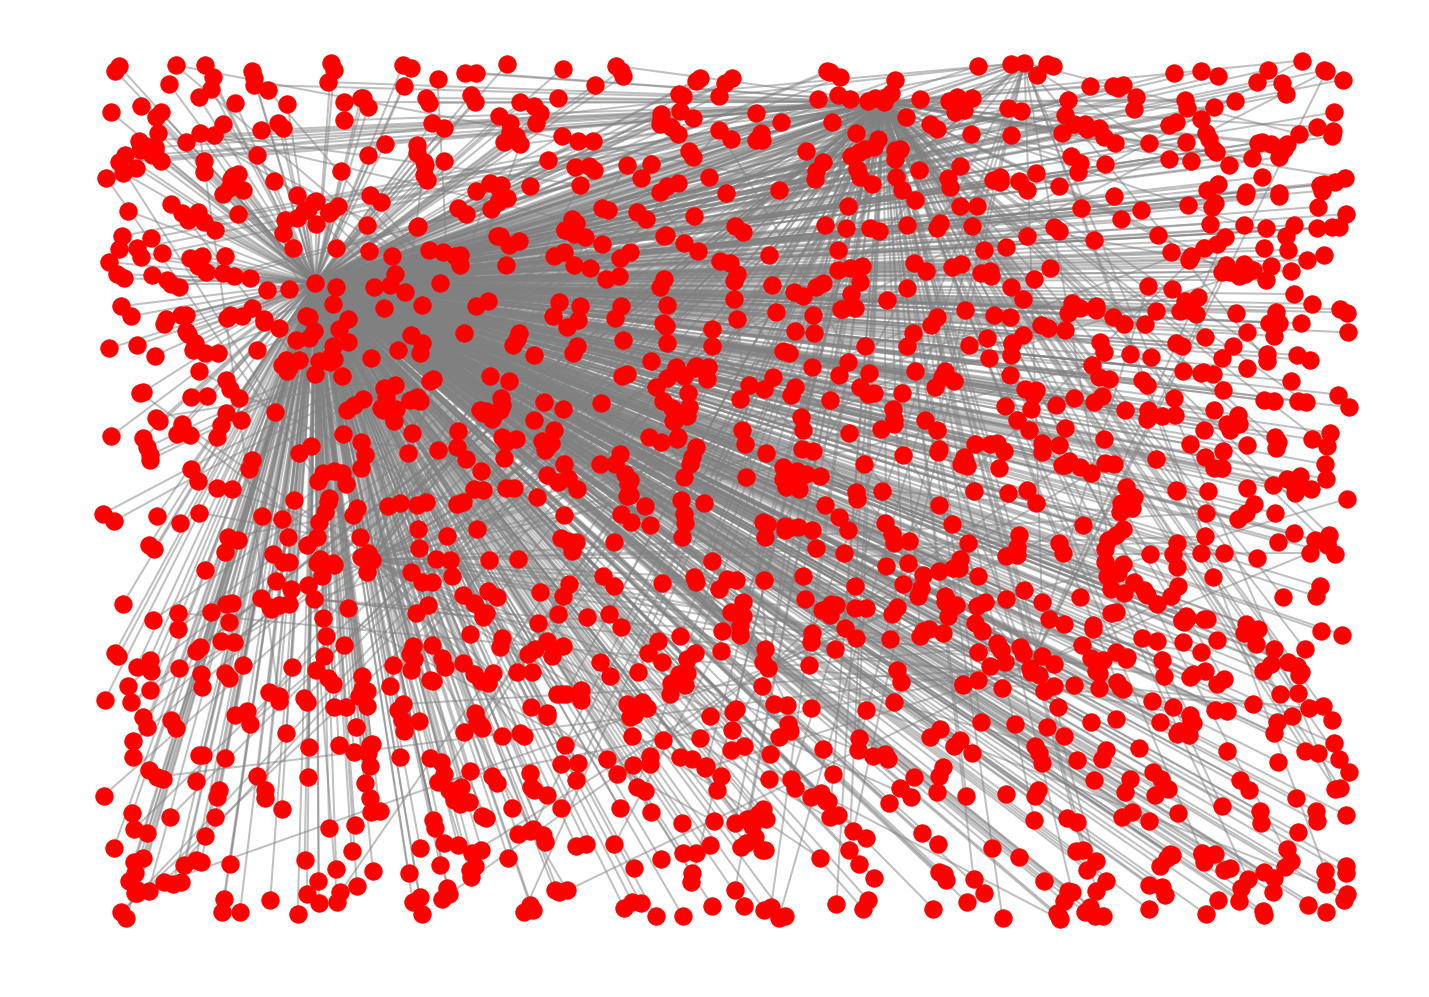

In [1195]:
# set figure size
plt.figure(figsize=(20,14))
# determine the positions using spring layout
pos = nx.random_layout(g)
g = nx.Graph()
# Building the graph from the node sets and edges
a_nodes = list(author_nodes['Author_Name'])    
j_nodes = list(journal_nodes['Journal'])
edge_bunch = [tuple(i) for i in df_m.values]

# Separate Author node and Journal Node e
g.add_nodes_from(a_nodes, bipartite=0)
g.add_nodes_from(j_nodes, bipartite=1)
g.add_edges_from(edge_bunch)
# add edges
nx.draw_networkx_edges(g,pos,edge_color='grey',
    alpha=0.5,width=2)


# nx.draw(g,pos)
nx.draw_networkx_nodes(g, pos, with_labels=1)
# set tight layout
plt.tight_layout()
# remove axis
plt.axis('off')

plt.show()

> graph from Gephi
+ Green : Journals 
+ Red   : Authors

![](fulldata1.png)

> Showing Name of Journals

![](fulldataj.png)

In [1198]:
# Adding Category Attribute to Node from Author and Journal 
for node in a_nodes:
    g.node[node]["category"] = "Author"
    
for node in j_nodes:
    g.node[node]["category"] = "Journal"
     
color_map = {
    "Author": "red",
    "Journal": "green"
}

In [1199]:
# Checking Attribute with one Author 
g.nodes['Geim, A. K.']

{'bipartite': 0, 'category': 'Author'}

In [1201]:
# Checking Attribute with one Jurnal 
g.nodes['The Astrophysical Journal']

{'bipartite': 1, 'category': 'Journal'}

In [1196]:
# Reading data in GML format to study in Gephi
# nx.write_gml(g,"mode.gml")

<b>Total number of Journals </b> 16 and <b> Total number of Authors </b> 1662

In [1208]:
print("Number of Journals: ",len(set(df_m.Journal)))
set(df_m.Journal)

Number of Journal  16


{'A Wiley-Interscience Publication',
 'Annual Review of Astronomy and Astrophysics',
 'Astronomy and Astrophysics',
 'Astronomy and Astrophysics Supplement Series',
 'ESA Special Publication',
 'Monthly Notices of the Royal Astronomical Society',
 'Nature',
 'Nature Materials',
 'Physical Review Letters',
 'Princeton',
 'Publications of the Astronomical Society of the Pacific',
 'Reviews of Modern Physics',
 'San Francisco: W.H. Freeman',
 'The Astronomical Journal',
 'The Astrophysical Journal',
 'The Astrophysical Journal Supplement Series'}

In [1210]:
print("Number of Authors: ",len( set(df_m.Author_Name)))

Number of Authors:  1662


In [1325]:
# # weighted_projections can be applied to this subgraph to separate the two components
# Journals,Author_Names = bi.sets(sg_largest) 

![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/Eigen.png?raw=true)

##### Eigenvector 
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/EigenName.png?raw=true)


The network graphs above show a large network, in which trends and connections are hard to define due to the large size.

In [1238]:
#Information about nodes, edges, and degree of the data
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 1678
Number of edges: 1694
Average degree:   2.0191


### Bipartite Graph

In graph theory, a bipartite graph (or bigraph) is a graph whose vertices can be divided into two disjointed sets and (that is, and are each independent sets) such that every edge connects a vertex in to one in i.e. no two graph vertices within the same set are adjacent. Vertex sets are usually called the parts of the graph.

Lets check if our Graph `g` is bipartite ?

In [1254]:
nx.is_bipartite(g)

True

Using the bipartite attrubite of nodes we will group the nodes of our Bipartite graph in two set of nodes i.e. 
+ Top Node and 
+ Bottom Node.

In [1255]:
# identify top and bottom nodes
top_nodes = {n for n, d in g.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(g) - top_nodes

> Let's plot the Bipartite graph and see how our nodes are represented.

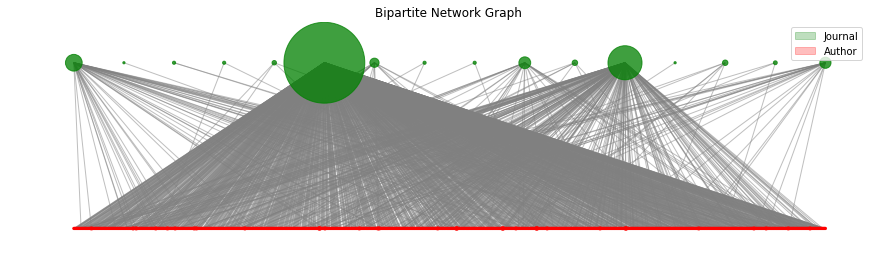

In [1257]:
# legend color patch list
legendColorPatch=list()
plt.figure(figsize=(15, 4))           
# set layout position
pos=nx.bipartite_layout(g,bottom_nodes, align='horizontal') 
colors=[]
color=bipartite.color(g)
for n, c in g.nodes('bipartite'):
    if (c == 1 ):
        colors.append('green')
    else:
        colors.append('red')

# nodes
d = g.degree()
nx.draw_networkx_nodes(g,pos, node_color=colors,node_size=[v*5 for v in dict(d).values()],alpha=0.75,label=True)

# edges drawn with widths set to edge weight
nx.draw_networkx_edges(g,pos,alpha=0.5,edge_color='grey',style='solid')
# Add Legend
# add legend color patch (stock)
colorPatch=mpatches.Patch(color='g', label='Journal',
    alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (condition)
colorPatch=mpatches.Patch(color='r', label='Author',
    alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)

plt.axis('off')
plt.title('Bipartite Network Graph')
plt.show()

Now we want to check if our graph is connected, which means we want to find out if there is a path joining each pair of nodes, the graph being undirected. It is always possible to travel in a <b>connected graph</b> between one vertex and any other; no vertex is isolated. <br>
Here graph <b>g</b> is not a connected graph and hence called a <b> disconnected graph </b>, which indicates that it has some isolated pair of nodes in the netwrok. Such isolated pairs or group of nodes are called  <b>components </b> and in disconected graphs we would have many such components. 

In [1242]:
# determine if the graph is connected
isConnectedFlag=nx.is_connected(g)
# determine if the graph is directed
isDirectedFlag=nx.is_directed(g)
# determine if the graph is bipartite
isBipartiteFlag=nx.is_bipartite(g)

isConnectedFlag, isDirectedFlag,isBipartiteFlag

(False, False, True)

#### Bipartite graphs can be better viewed in Matrix of Row (Node1) and Columns(Node 2) and connection as 1 (member) or 0 (not member)  

In [1258]:
adm= bi.biadjacency_matrix(g,a_nodes,j_nodes)  # For Author as Row
jdm= bi.biadjacency_matrix(g,j_nodes,a_nodes)  # For Journal as Row

In [1264]:
# Adjacency Matrix from Bipartile grpah is a CSR_Matrix (Compresses-Sparse-Column) 
# which needs to deciperhered to get the real value.
print("Biadjacency_matrix adm is of type :",type(adm))

Biadjacency_matrix adm is of type : <class 'scipy.sparse.csr.csr_matrix'>


In [1277]:
# Return a Coordinate (coo) representation of the Compresses-Sparse-Column (csc) matrix.
coo = adm.tocoo(copy=False)
print( "Type of Coordinate  Matrix (coo) from CSR Matrix (adm) :", type(coo))
tdk = coo.col      # ids of columns 
tdkr = coo.row     # ids of Row 
print("Type of coo.col",type(tdk))
print("Number of Rows :{} and Columns : {} ". format(len(set(tdk)),len(set(tdkr))))



Type of Coordinate  Matrix (coo) from CSR Matrix (adm) : <class 'scipy.sparse.coo.coo_matrix'>
Type of coo.col <class 'numpy.ndarray'>
Number of Rows :16 and Columns : 1662 


Let's create a dataframe with all the rows and column and data from coordinate value matrix.

In [1278]:
adm_df = pd.DataFrame({'Author': coo.row, 'Journal': coo.col, 'data': coo.data})
# Add Author Name and Journal Name in dataframe Column 
adm_df['J_name'] = [j_nodes[n] for n in adm_df['Journal']]
adm_df['A_name'] = [a_nodes[n] for n in adm_df['Author']]
adm_df.head()

,Author,Journal,data,J_name,A_name
0,0,0,1,Nature Materials,"Geim, A. K."
1,1,0,1,Nature Materials,"Novoselov, K. S."
2,2,1,1,Astronomy and Astrophysics,"Shakura, N. I."
3,3,1,1,Astronomy and Astrophysics,"Sunyaev, R. A."
4,4,2,1,The Astrophysical Journal Supplement Series,"Spergel, D. N."


> Matrix view of 2 node network data.

Here row names are Authors, and Column names are Journal.

In [1246]:
graphMat= pd.pivot_table(adm_df,values='data', index='A_name', columns='J_name',fill_value=0)
graphMat.head()


J_name,A Wiley-Interscience Publication,Annual Review of Astronomy and Astrophysics,Astronomy and Astrophysics,Astronomy and Astrophysics Supplement Series,ESA Special Publication,Monthly Notices of the Royal Astronomical Society,Nature,Nature Materials,Physical Review Letters,Princeton,Publications of the Astronomical Society of the Pacific,Reviews of Modern Physics,San Francisco: W.H. Freeman,The Astronomical Journal,The Astrophysical Journal,The Astrophysical Journal Supplement Series
A_name,,,,,,,,,,,,,,,,
"Abazajian, Kevork N.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
"Abbott, B. P.",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Abbott, R.",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Abbott, T. D.",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Abernathy, M. R.",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1279]:
#Find and Journal and its Author
pd.pivot_table(adm_df[adm_df.J_name=='A Wiley-Interscience Publication'],values='data', index='A_name', columns='J_name',fill_value=0)


J_name,A Wiley-Interscience Publication
A_name,
"Shapiro, Stuart L.",1
"Spitzer, Lyman",1
"Teukolsky, Saul A.",1


Below Graph shows the Journal with Degree 
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/bipart1-J.png?raw=true)

Now we will reconstruct the Graph from this data set of Matrix.

In [1226]:
# create graph from dataframe biadjacency matrix
def graphFromBiadjacencyPandasDf(df):
    # create empty graph
    G = nx.Graph()
    # iterate over rows
    for i in df.index:
        # add row label [mode 0]
        G.add_node(i, bipartite=0)
        # iterate over columns
        for j in df.columns:
            # add column label [mode 1]
            G.add_node(j, bipartite=1)
            # if value is greater than zero
            #print(str(i)+'|'+str(j)+'|'+str(df.loc[i,j]))
            if (df.loc[i,j] > 0):
                # add weighted edge
                #B.add_edge(i, j, weight=df.ix[i,j])
                # add edge
                G.add_edge(i, j)
    # return bipartite graph
    return G

In [1248]:
adm_df.head()

,Author,Journal,data,J_name,A_name
0,0,0,1,Nature Materials,"Geim, A. K."
1,1,0,1,Nature Materials,"Novoselov, K. S."
2,2,1,1,Astronomy and Astrophysics,"Shakura, N. I."
3,3,1,1,Astronomy and Astrophysics,"Sunyaev, R. A."
4,4,2,1,The Astrophysical Journal Supplement Series,"Spergel, D. N."


In [1281]:
# convert adjacency matrix to graph
# Passing the Authoer name and Journal Data

G = graphFromBiadjacencyPandasDf(graphMat)

# determine if the graph is connected
isConnectedFlag=nx.is_connected(G)
# determine if the graph is directed
isDirectedFlag=nx.is_directed(G)
# determine if the graph is bipartite
isBipartiteFlag=nx.is_bipartite(G)

# Creating Data Frame to Store info about new grpah G
adm_df_G =   adm_df[['Author','Journal','data']]
adm_df_G.head()

,Author,Journal,data
0,0,0,1
1,1,0,1
2,2,1,1
3,3,1,1
4,4,2,1


We can see that the network *G* is bipartite, but neither directed nor connected as follows:

In [1250]:
isConnectedFlag

False

In [1251]:
isDirectedFlag

False

In [1252]:
isBipartiteFlag

True

##### Now compute the Degree of each Node

In [1293]:
# degree by node
degreeByNode = G.degree()
degreeByNode[('Astronomy and Astrophysics')]

28

In [1298]:
# convert degree dictionary to dataframe
degreeByNodeDf=pd.DataFrame.from_dict(degreeByNode)

print("Total rows i.e Authors:",len(a_nodes))
degreeByNodeDf.head()


Total rows i.e Authors: 1662


,0,1
0,"Abazajian, Kevork N.",1
1,A Wiley-Interscience Publication,3
2,Annual Review of Astronomy and Astrophysics,6
3,Astronomy and Astrophysics,28
4,Astronomy and Astrophysics Supplement Series,6


In [1299]:
# Function to Calcuate Degree of each node

def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    fmbipart = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node),fmbipart.append(G.nodes[node]['bipartite'])
            
    return fmdegree,fmNode ,fmbipart




In [1301]:
# Calcualting Degree of Nodes , bipartle attribute and Nodes by passing Graph in Calculate Degree method 
gpdDegree , gpdNode , gpdBi = calcualte_degree(G,0)
G.nodes['Abazajian, Kevork N.']['bipartite']

0

In [1303]:
# Creating a Dataframe with Degree info and nodes and Bipartile attribute of nodes
# 0 is for Authors
# 1 is for Journals
data = {'Node': gpdNode, 
        'Degree': gpdDegree,
       'Bipart': gpdBi}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()
df_NodeDegree.sort_values(by=['Degree'],ascending= False).head(20)




,Node,Degree,Bipart
9,Physical Review Letters,1307,1
16,The Astrophysical Journal Supplement Series,232,1
15,The Astrophysical Journal,56,1
3,Astronomy and Astrophysics,28,1
6,Monthly Notices of the Royal Astronomical Society,25,1
14,The Astronomical Journal,17,1
2,Annual Review of Astronomy and Astrophysics,6,1
4,Astronomy and Astrophysics Supplement Series,6,1
12,Reviews of Modern Physics,4,1
638,"Heckman, Timothy M.",3,0


### Calculate Edge weight 
We will use dot product of Author's Degree and journal's Degree to calculate edge_weight, and then we will analyse our graphs components.

In [1305]:
df_m.head()  # Default Edge list

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
0,Nature Materials,"Novoselov, K. S."
1,Astronomy and Astrophysics,"Shakura, N. I."
1,Astronomy and Astrophysics,"Sunyaev, R. A."
2,The Astrophysical Journal Supplement Series,"Spergel, D. N."


In [1307]:
df_NodeDegree[df_NodeDegree.Node.isin(['Nature Materials','Astronomy and Astrophysics','Geim, A. K.', 'Novoselov, K. S.', 'Shakura, N. I.', 'Sunyaev, R. A.', 'Spergel, D. N.'])]
set(df_NodeDegree.Degree)

{1, 2, 3, 4, 6, 17, 25, 28, 56, 232, 1307}

In [1308]:
#df_m.iloc[2][1] 
#range(len(df_m))

#df_NodeDegree[df_NodeDegree.Node.isin(['Nature Materials','Astronomy and Astrophysics','Geim, A. K.', 'Novoselov, K. S.', 'Shakura, N. I.', 'Sunyaev, R. A.', 'Spergel, D. N.'])]
# df_NodeDegree[df_NodeDegree.Node == 'Physical Review Letters' ]['Degree'].values[0]

# We will calcualte the edege weight as the Degree of the Both the node and later on normalizing it by
# Devide all weight by max of weight
df_m['edge_Weight'] = [ (df_NodeDegree[df_NodeDegree.Node == df_m.iloc[i][1]]['Degree'].values[0]  )*
               (df_NodeDegree[df_NodeDegree.Node == df_m.iloc[i][0]]['Degree'].values[0])
               for i in range(len(df_m))  ] 
df_m.head()



,Journal,Author_Name,edge_Weight
0,Nature Materials,"Geim, A. K.",2
0,Nature Materials,"Novoselov, K. S.",2
1,Astronomy and Astrophysics,"Shakura, N. I.",28
1,Astronomy and Astrophysics,"Sunyaev, R. A.",28
2,The Astrophysical Journal Supplement Series,"Spergel, D. N.",232


In [763]:
# Droping this code and using Log in the final plotting 
# max_edge_weight= df_m['edge_Weight'].max()
# df_m['edge_Weight'] = df_m['edge_Weight']/df_m['edge_Weight'].max()

In [1309]:
df_m.head() # Edgelist with Edge_weight 

,Journal,Author_Name,edge_Weight
0,Nature Materials,"Geim, A. K.",2
0,Nature Materials,"Novoselov, K. S.",2
1,Astronomy and Astrophysics,"Shakura, N. I.",28
1,Astronomy and Astrophysics,"Sunyaev, R. A.",28
2,The Astrophysical Journal Supplement Series,"Spergel, D. N.",232


Creating new Graph object <b>wG </b> , which will have weigted edge . 

In [1310]:
wG = nx.from_pandas_edgelist(df_m, 'Journal', 'Author_Name',edge_attr=True)
nx.is_bipartite(wG) # is Bipartite 

True

In [1312]:
# All the nodes connecting to this nodes are listed below with Edge attribute 
wG['Nature Materials'] 

AtlasView({'Geim, A. K.': {'edge_Weight': 2}, 'Novoselov, K. S.': {'edge_Weight': 2}})

In [1315]:
# # Working code commented to save printing space 
# wG.edges.data('edge_Weight')


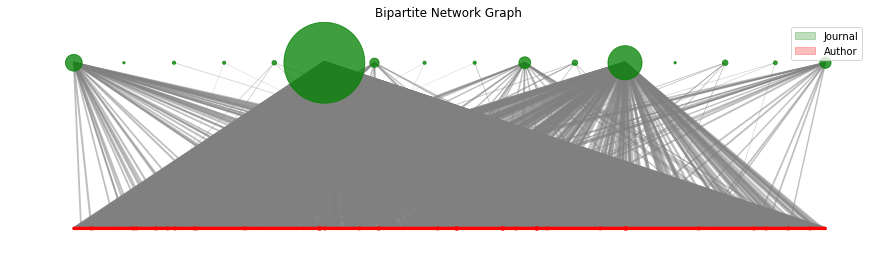

In [1171]:
# PLotting Bipartite graph again from wG

# Adding Nodes 
wG.add_nodes_from(a_nodes, bipartite=0)
wG.add_nodes_from(j_nodes, bipartite=1)

# legend color patch list
legendColorPatch=list()
plt.figure(figsize=(15, 4))           
# set layout position
pos=nx.bipartite_layout(wG,bottom_nodes, align='horizontal') 
colors=[]
color=bipartite.color(wG)
for n, c in wG.nodes('bipartite'):
    if (c == 1 ):
        colors.append('green')
    else:
        colors.append('red')


d = wG.degree()
# nx.draw(wG,with_labels=1)
nx.draw_networkx_nodes(wG,pos, node_color=colors,node_size=[v*5 for v in dict(d).values()],alpha=0.75,with_labels=1)

# edges drawn with widths set to edge weight
nx.draw_networkx_edges(wG,pos,alpha=0.5,edge_color='grey',width=[math.log10(c) for (u, v, c) in wG.edges.data('edge_Weight')],style='solid')

# Since  graph is not looking good, rmoving the Label 
# add labels 
# labels = nx.get_edge_attributes(wG,'edge_Weight')
# nx.draw_networkx_labels(wG,pos=pos,font_size=5)


# Add Legend
# add legend color patch (stock)
colorPatch=mpatches.Patch(color='g', label='Journal',
    alpha=plotAlpha)
legendColorPatch.append(colorPatch)
# add legend color patch (condition)
colorPatch=mpatches.Patch(color='r', label='Author',
    alpha=plotAlpha)
legendColorPatch.append(colorPatch)

# add legend
plt.legend(handles=legendColorPatch)
plt.axis('off')
plt.title('Bipartite Network Graph')
plt.show()

In [1317]:
# Graph wG is also not Connected 
nx.is_connected(wG)

False

# Island Method

The island method will be used to split up the network into smaller components.  The logic behind the island method is to consider the network as an island with peaks and valleys.  As the water level is raised, the network becomes divided - some parts of the network are removed (they are under water) while other more significant parts of the network remain and are split into different segments. Now these smaller segments can be better analyzed.


Green Journal 
Rest Author

![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/gj.jpg?raw=true)
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/gj1.jpg?raw=true)



##### Connected Component 
In all above graphs we see that it's a big graph but its not fully connected graph, Now we will try find connected graph in this graph following method:

(array([9., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([   2. ,  132.6,  263.2,  393.8,  524.4,  655. ,  785.6,  916.2,
        1046.8, 1177.4, 1308. ]),
 <a list of 10 Patch objects>)

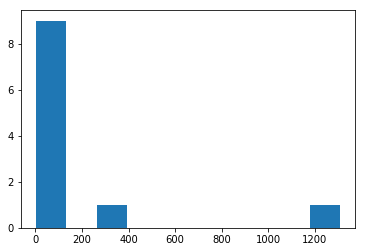

In [1328]:
# so we have total 11 component 
x = [len(c) for c in nx.connected_component_subgraphs(g)]
plt.hist(x)


In [1326]:
print(len([(len(i),i) for i in nx.connected_component_subgraphs(wG) if len(i)]))
[(len(i),i) for i in nx.connected_component_subgraphs(wG) if len(i)]

11


[(3, <networkx.classes.graph.Graph at 0x25f236bc6d8>),
 (29, <networkx.classes.graph.Graph at 0x25f236bcb00>),
 (312, <networkx.classes.graph.Graph at 0x25f236bca58>),
 (7, <networkx.classes.graph.Graph at 0x25f236bc3c8>),
 (3, <networkx.classes.graph.Graph at 0x25f236bc240>),
 (1308, <networkx.classes.graph.Graph at 0x25f236bc128>),
 (4, <networkx.classes.graph.Graph at 0x25f236bc668>),
 (2, <networkx.classes.graph.Graph at 0x25f236bcc88>),
 (3, <networkx.classes.graph.Graph at 0x25f236bc2e8>),
 (5, <networkx.classes.graph.Graph at 0x25f236bc908>),
 (2, <networkx.classes.graph.Graph at 0x25f236bc5f8>)]

This results shows that we have 11 connected components in this network which can exaplain this network. We have a total of 11 components, and the biggest component has a size of 1308 and rest all are less than 100 and only one with size of 312. 
We may consider the big component as whole netwrok but it would still be big to do any analysis.<br> Gephi shows them all :

![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/componnet10.png?raw=true)


Lets check Max and Min weight of the Edge in each Component to identify if we can find any islands in these connected components.


In [1389]:
cc= list(nx.connected_component_subgraphs(wG))

print("min,max","      |      [max-min]")
for i in range(len(cc)):
    weights= [(c) for (u, v, c) in cc[i].edges.data('edge_Weight')]
    print("Componnet {} of size {} has Maximum Edge Weight:{} and Mininum Edge weight:{} with differnce :[{}]".
         format(i,len(cc[i]),int(max(weights)),int(min(weights)),(int(max(weights))-int(min(weights)))))


min,max       |      [max-min]
Componnet 0 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 1 of size 29 has Maximum Edge Weight:28 and Mininum Edge weight:28 with differnce :[0]
Componnet 2 of size 312 has Maximum Edge Weight:696 and Mininum Edge weight:2 with differnce :[694]
Componnet 3 of size 7 has Maximum Edge Weight:6 and Mininum Edge weight:6 with differnce :[0]
Componnet 4 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 5 of size 1308 has Maximum Edge Weight:1307 and Mininum Edge weight:1307 with differnce :[0]
Componnet 6 of size 4 has Maximum Edge Weight:3 and Mininum Edge weight:3 with differnce :[0]
Componnet 7 of size 2 has Maximum Edge Weight:1 and Mininum Edge weight:1 with differnce :[0]
Componnet 8 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 9 of size 5 has Maximum Edge Weight:4 and Mininum Edge weight:4 with differnce :[0]
Componnet 1

This indicates that we can't find island in any Components except Component 3 (at index 2). Rest all have same edge weight and may go off the water level if dropped from the network.  

In [1391]:
# Makaing Componnet 2 as  Graph we woould try analyse further and see how many Island we can find it. 

big_subg = cc[2]
print(len(big_subg))

312


###### This subgraph is also a connected subgraph or components of the Graph.

In [1392]:
nx.is_connected(big_subg)

True

We can see that this graph is connected Graph and it means there is path from one node to every other node within this component. 

In [1393]:
## Implementing the Island Method to look for important subgroups. 
def trim_edges(b, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    b2 = nx.Graph()
    for u, v, c in b.edges(data=True):
#         print("c:",c['edge_Weight'])
        if c['edge_Weight'] > weight:
            b2.add_edge(u,v, weight=c)
    return b2

## Return list of graphs each corresponding to different thresholds
def island_method(B, iterations=3):
    weights= [(c) for (u, v, c) in B.edges.data('edge_Weight')]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of step
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(B, threshold)] for threshold in range(mn,mx,step)]
#     return [[threshold] for threshold in range(mn,mx,step)]


In [1336]:
island = island_method(big_subg, iterations =  3)
#print the threshold level, size of the graph, and number of connected components
for i in island:
    print("Threshold:",i[0], "Size:",len(i[1]), "Connections:", len(list(nx.connected_component_subgraphs(i[1]))))

# island

Threshold: 2 Size: 311 Connections: 1
Threshold: 233 Size: 13 Connections: 1
Threshold: 464 Size: 5 Connections: 1
Threshold: 695 Size: 5 Connections: 1


When all links with a value of 2 (i.e., edge weight of 2 ) are dropped, the network separates into only 1 island subgraphs  representing a group of people connected amongst each other. 

Since Degree of 2 doen't have much impact, as these may be groups of authors that communicate repeatedly and thus have developed some kind of a trust relationship.

If you also note that as we keep dropping the weighted Edge, the number of Graph remains same but size of the Graph is going down, it means that only the feature that represents the graphs can be achevied by 5 nodes with edge_weight of 695 or 464.

In [1444]:
# Working code 
# big_subg.edges.data('edge_Weight')
# big_subg.add_nodes_from(a_nodes, bipartite=0)
# big_subg.add_nodes_from(j_nodes, bipartite=1)

colors=[]
# some labels
labels={}

i= -1
for n in big_subg.nodes():
    i = i +1
    if (df_NodeDegree[df_NodeDegree.Node==n]['Bipart'].values[0] == 1 ):
        colors.append('green')
        labels[i] = n
    else:
        colors.append('red')
        labels[i] = ""

big_subg.node['Marriner, John P.']



dp = { n: df_NodeDegree[df_NodeDegree.Node==n]['Bipart'].values[0] for n in df_NodeDegree.Node}
# key = frozenset(dp.items())
# nx.set_node_attributes(big_subg,'bipartite',dp)
# dp

set(colors)


{'green', 'red'}

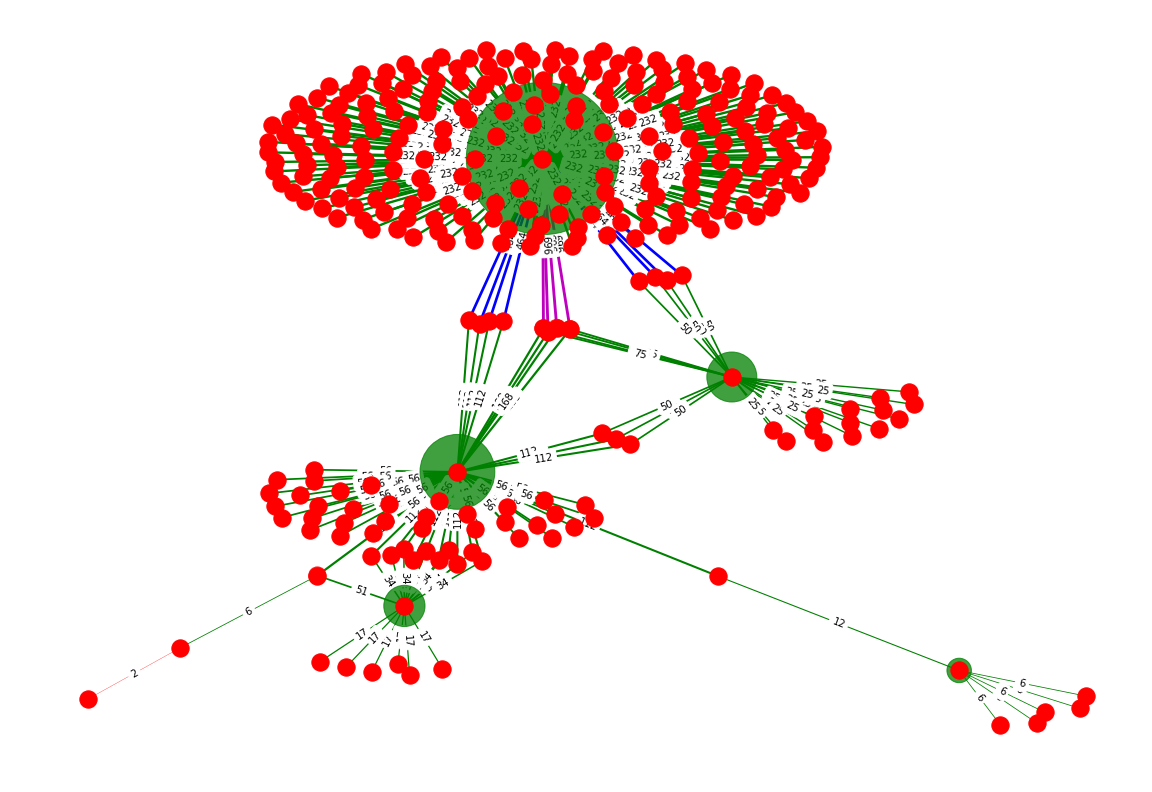

In [1453]:

from networkx.drawing.nx_agraph import graphviz_layout
# determine the positions using spring layout
# pos=nx.(big_subg)
pos = nx.circular_layout(big_subg)
pos= nx.spring_layout(big_subg,scale=5)
# pos = nx.graphviz_layout(big_subg)

# # icolors = [big_subg[u][v]['color'] for u,v in edges]
iweights = [big_subg[u][v]['edge_Weight'] for u,v in iedges]
set(iweights)
plt.figure(figsize=(20,14))

#Node COlor 

# nodes
d = big_subg.degree()

nx.draw_networkx_nodes(big_subg,pos, node_color=colors,node_size=[v*100 for v in dict(d).values()],alpha=0.75,label=True)


#Edge color

icolor=[]
for i in range(len(iweights)):
    if iweights[i] <=2 :
        icolor.append('r')
    elif iweights[i]  <=233  :
        icolor.append('g')
    elif iweights[i]  <=464  :
        icolor.append('b')
    elif iweights[i]  <=695  :
        icolor.append('m')        
    else:
        icolor.append('m')    
        
set(icolor  ) 
#  iweights 

# [(a,b,c) for a,b,c in tempbig_subg.edges.data('edge_Weight')]

# specifiy edge labels explicitly
edge_labels=dict([((u,v,),d['edge_Weight'])
             for u,v,d in big_subg.edges(data=True)])

# nx.draw_networkx_nodes(big_subg,pos, node_color=colors)

nx.draw(big_subg, pos, edges=iedges, edge_color=icolor,width= numpy.log10(iweights))
# nx.draw(big_subg, nx.spring_layout(big_subg,scale=5), edges=iedges, edge_color=icolor,width= numpy.log10(iweights))

# add labels
# nx.draw_networkx_labels(big_subg,pos,labels,font_size=16)
# networkx.draw_networkx_labels(big_subg,pos=pos,font_size=8)
nx.draw_networkx_edge_labels(big_subg,  pos, edge_labels = edge_labels)

plt.show()

From the above graph we can very clearly see that the Graph with Higher Degree are mostly made up of with higher dergeee or edge weight. So if we drop Edge weight = 2, the Network would still be 1 as we don't have much edge with edge weight of 2 

Breaking Down te data to Author and Journal at this component.

In [1458]:
# weighted_projections can be applied to this subgraph to separate the two components
Author_Names , Journals= bi.sets(big_subg) 

In [1459]:
Journals,len(Author_Names),len(Journals)

({'Annual Review of Astronomy and Astrophysics',
  'Monthly Notices of the Royal Astronomical Society',
  'Princeton',
  'The Astronomical Journal',
  'The Astrophysical Journal',
  'The Astrophysical Journal Supplement Series'},
 306,
 6)

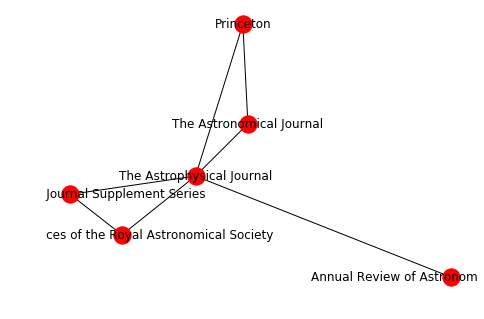

In [1461]:
j_proj_sg_largest = bi.weighted_projected_graph(big_subg, Journals) #Creating the subgroup of the Journal
nx.draw(j_proj_sg_largest,with_labels=1)
plt.show()

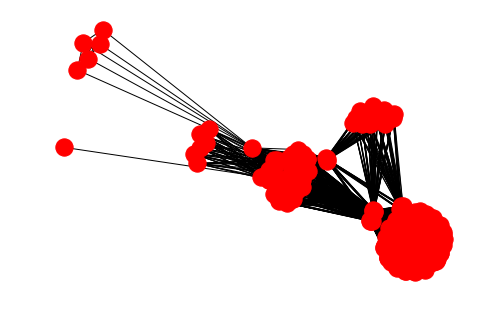

In [1462]:
a_proj_sg_largest = bi.weighted_projected_graph(big_subg, Author_Names) #Creating the subgroup of the Author
nx.draw(a_proj_sg_largest)
plt.show()

### Conclusion:
From the journal island graph we can see that there are few authors cluster together with same journal. The network shown above is more managable and it is easier to see connections between authors and journals.  


Our inital thought was that, we may not have any author shared among the Journal, but with the help of Component Analysis and Island method we were able to break the graph in samller chunks to better understand its connection with respect to our edge weight. 

We also noted that our dataset was very limited in terms of showing too many islands in the network. 

<center>--------------------------------------:-:-:-------------------------------------<center>